# I. Fetch raw data
MNSIT is an org that put out 70K pictures of handwritten numerical digits. It's understood in the ML community that saying MNIST refers to the dataset, because this is an industry-standard beginner's exercise, like the "Hello, World" of ML.

If we successfully download the images, the keys will look like:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details','categories', 'url'])

In [1]:
from sklearn.datasets import fetch_openml # this is tool for fetching named datasets
mnist = fetch_openml('mnist_784', version=1) #need to download 15 megabytes of compressed images (55 mb) once, then scikit will cache it automatically
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import pandas as pd
import numpy as np

### 1. Dividing data
Before we split training vs testing data, we need to split between inputs and outputs

__INPUTS__: "X" represents the images (inputs)<br>
__OUTPUTS__:"y" represents the actual numerical values, represented eventually as integers

In [3]:
X = mnist["data"]
y = mnist["target"]

### 2. Eyeballing data
"X" represents the images<br>
"y" represents the actual numerical values, represented eventually as integers

In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
X.shape  # (70000, 784) because there's 70,000 images and 784 features/data points per image (28x28 pixels)

(70000, 784)

In [6]:
y.shape  # verifies there's 70,000 numerical values assigned to said images

(70000,)

In [7]:
#converting to numpy in response to an error message
X = X.to_numpy()

In [8]:
X[0] # this is how one image looks, a  matrix of values up to 256 (shades of gray)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# II. Preparing data
"X" represents the images<br>
"y" represents the actual numerical values, represented eventually as integers

In [9]:
y[0] #what's the 1st digit marked as? CAUTION: answer is in string format, so we will later convert to integers

'5'

In [10]:
y = y.astype(np.uint8) # convert string to integer
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

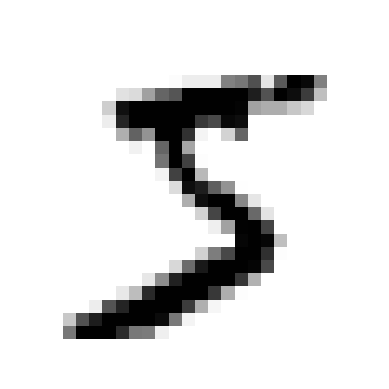

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0] #seeing the 1st of 70,000 images
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [12]:
training_quantity = 60000 #we are taking the first 60,000 of 70,000

X_train = X[:training_quantity]
y_train = y[:training_quantity]

X_test = X[training_quantity:]
y_test = y[training_quantity:]

## 1. Binary Classification (Hot dog...not hot dog)
#### The next code block is confusing because you might expect something like:

__x_train_5__ and<br>
__y_train_5__ combined will inform us on how...<br>
<br>
__x_test_5__ predicts<br>
__y_test_5__

#### What we're actually doing:
Just limit the data, both training and testing sets, down to the 5's. We're only focused on understanding whether something is a 5 or not at this point, so any non-5 images or integers will just cause unnecessary confusion.

In [13]:
y_train_5 = (y_train == 5)  # True for 5s, False for others
y_test_5 = (y_test == 5)    # True for 5s, False for others

# III. Training First Model - Stochastic Gradient Descent (SGD)
### 1. Full-Batch Gradient Descent (more accurate)
- Absorbs all 60,000 examples of training data in one big gulp before calculating model "parameters" weights or coefficients
- More accurate because it's processing all data available
- Slower, so more suitable for smaller data-sets (10K to 40K images)

### 2. Stochiastic Gradient Descent (faster)
- Absorbs 1 image and 1 recalculation at a time, looped 60,000 times
- Which means less pressure on memory usage
- You don't need to wait until all 60,000 images are seen to start benefiting
- Less accurate, because it's like course-correcting a car where you can only see 3 feet ahead of you instead of the full 30 mile route.
- Faster, better for larger datasets, which is why the textbook is assuming SGD over FBGD.

In [14]:
from sklearn.linear_model import SGDClassifier # not the full batch, as discussed above

# CAUTION: did not specify SGD's loss-minimization method as "log" for logistic regression, so defaulting to "hinge" for SVM or Support Vector Machine
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

### 3. Testing image recognition
Confirmed, but let's try some other examples we know aren't 5's

In [15]:
y[0]

np.uint8(5)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

### 4. Testing index of 1 (value of 3)
Confirmed! That makes us 2 for 2 on guesses, 1 correct positive and 1 correct negative.

In [17]:
y[1]

np.uint8(0)

In [18]:
sgd_clf.predict([X[1]])

array([False])

# IV. Evaluating first method: SGD
### 1. What's cross-validation and mechanically, how do I do it?
In the first project on housing price predictions, remember how we chopped training data?
- We started with 70,000 images
- 60,000 is training data
- We take the training data and cut into 5 evenly-sized "folds" of 12,000 images each
- Looping 5 times, we train on 4 of 5 folds, then use the remaining fold as test data against the other 48,000

### 2. Overfitting risk and how cross-validation mitigates it
- Overfitting is when your model falsely concludes generalized patterns based on happenstance patterns it sees in that particular training data i.e. it's taking the data too literally
- Cross-validation looks at the training data from 5 instead of 1 camera angle, leading to more robust conclusions

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### 3. Accuracy calculated, but misleading
To the untrained eye, it's exciting to see 3 fold's scores averaging 95.7% accuracy within minutes. However, consider this:
- There are 10 unique answers ranging from 0 through 9 inclusive
- Assuming a roughly even and random distribution of number choices, that means a 5 would show up ~ 10% of the time and ~90% it would not be a 5
- So you could create a ~90% accurate model simply by instructing it __"always assume it's not a 5"__

### 4. Smarter way to evaluate results: "Precision" & "Recall"
  
#### What is "Precision"?
- Prioritizes __quality__: *When someone gives me an answer, how much should I trust it?*
- Defined as (True Positives) / (True Positives + False Positives)
- For example, a call center wants to authenticate inbound phone callers's phone numbers while the customer is still inside the phone maze. If 1,000 consumers dial, there's typically 999 legitimates and 1 scammer using a fake phone number. Good precision is greenlighting only 700 of those 999 legitimates, but knowing that all 700 are in fact legitimate. We are willing to accept that 299 were not greenlit and inconvenienced by the customer service rep's oral questions.

#### What is "Recall"?
- Prioritizes __quantity__: *Did I catch all the Pokemon?*
- Defined as (True Positives) / (True Positives + False Negatives)
- You are a HR employee tasked with the first stages of talent acquisition and your CEO has challenged you to bring as many unicorn candidates to the table, but is expecting 3 final round candidates. After posting the job, you have 500 inbound resumes, and it is reasonable to expect there are 4 standouts in the pool, but you need to phone screen them to evaluate. You should make an educated guess as to who the best 50 phone screen candidates are to find 3 viable candidates, even if it cost you 47 dud calls. Even if your precision is only 6% (3/50), your recall is 75% (3 of 4). 

### 5. Forced tradeoffs
You can't increase both precision AND recall at the same time.

### 6. Confusion Matrix
A grid that will show what we guessed vs what it actually is, with values in each cell as to the accuracy or occurrence. Ideally, we'd want a dark line that goes diagonally from top left to bottom right.

Breakdown:
- 54,579 actually not 5's
  - 53,057 correctly reported as not 5 __true negative__
  - 687 incorrectly reported as a 5 __false positive__

- 5,421 actual 5s
  - 1,891 incorrectly reported as not 5 __false negatives__
  - 3,530 correctly reported as a 5 __true positives__

Going horizontally across columns is the model's prediction
Going vertically down across rows is the truth

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred) #same as above, but now we're COUNTING

array([[53892,   687],
       [ 1891,  3530]])

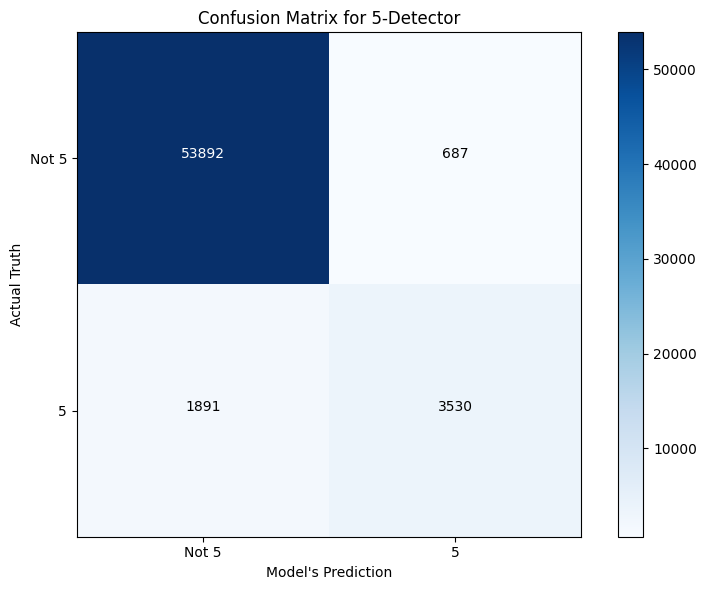

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

plt.figure(figsize=(8, 6))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for 5-Detector")
plt.colorbar()  # Neat little color bar, but potentially misleading because it shows absolute count as opposed to relative quality

# Define tick marks and labels, at scale I would use ChatGPT because this part is manual and error-prone
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Not 5", "5"])
plt.yticks(tick_marks, ["Not 5", "5"])

plt.xlabel("Model's Prediction")
plt.ylabel("Actual Truth")

# Add text annotations (the actual values)
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # Should be getting roughly 3500/(3500 + 700) = ~ 83%

np.float64(0.8370879772350012)

In [24]:
recall_score(y_train_5, y_train_pred) # should be getting roughly 3500/(3500+1900) = 65%

np.float64(0.6511713705958311)

### 7. F1 scoring
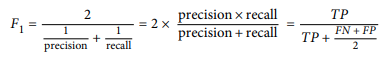<br>
Quantifying the balance between the precision and recall. We have decent precision but mediocre recall, so our F1 score won't be high.


# Dictating tradeoff strategies
We can use Scikit-Learn and dictate a "threshold", either positive or negative, that will prioritize precision or recall.
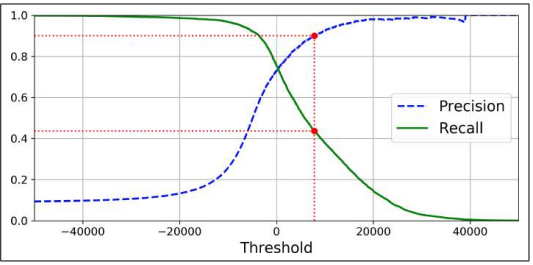

To demonstrate, let's move a threshold from zero to 8000. That would tighten up our reporting to be more precise while lowering our recall (coverage). By doing so, we run the risk of failing to catch a 5 when it's presented to us.

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [26]:
threshold = 0 # this is completely neutral
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred # correctly reports TRUE, that it's a 5

array([ True])

In [27]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred # 8000 is too conservative, so now we are falsely reporting it's not 5

array([False])

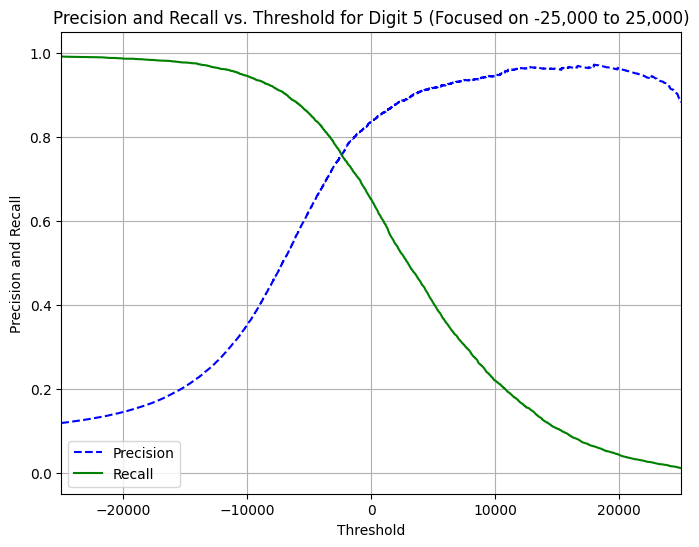

In [32]:
from sklearn.preprocessing import label_binarize # need this or else it will treat this as multiple labels
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_train_5 = (y_train == 5)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlim([-25000, 25000])
    plt.xlabel("Threshold")
    plt.ylabel("Precision and Recall")
    plt.title("Precision and Recall vs. Threshold for Digit 5 (Focused on -25,000 to 25,000)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

##### Take note that the precision is marked at 83% and the recall is 65% when they both cross the Zero-Threshold axis, in line with the numbers Scikit-Learn reported

### 8. Backing into a required threshold
If we increase the the threshold, we can eventually touch a 90% precision. Anchoring to 90% precision and eyeballing the chart, the threshold should be somewhere between +2500 and +5000?


If we anchored recall to a 90% requirement, then threshold would be around -6,000?

In [33]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991439557)

In [34]:
y_scores = sgd_clf.decision_function(X_train)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991439557)

In [35]:
from sklearn.metrics import precision_score

# Try a slightly lower threshold than 3370, like 3350 or 3300
threshold_test = 3350  # Adjust this value and experiment

# Make predictions using this adjusted threshold
y_train_pred_test = (y_scores >= threshold_test)

# Evaluate the precision at this adjusted threshold
adjusted_precision = precision_score(y_train_5, y_train_pred_test)
adjusted_recall = recall_score(y_train_5, y_train_pred_test)

print("Adjusted precision:", adjusted_precision)
print("Adjusted recall:", adjusted_recall)

Adjusted precision: 0.9508146326467876
Adjusted recall: 0.5705589374654123


### 9. Receiver Operator Curve (ROC)
This is a chart showing coverage (recall) of true positives and how it grows with the false positive errors.

#### Hitting an optimal inflection point
Eyeballing the blue line below, you can see we'd recall 90% of the 5's while falsely flagging only 5% of the non-5s. Since the MINST dataset is a beginner's exercise, understand these results are likely rosier than what we'd see in real life.

#### Why random guessing peaks at 100% errors when striving for 100% recall
Let's go back to the Talent Acquisition example. The only way to guarantee that you phone screen each of 4 unicorn candidates is to mark all 500 resumes as *"worth a phone call"*, meaning you will false positive on 496 of 496 non-unicorns.

#### Area Under Curve (AUC)
Just look at the chart - if the AUC takes up nearly the whole map, it means we can get the best of both worlds. We want this percentage as high as possible.

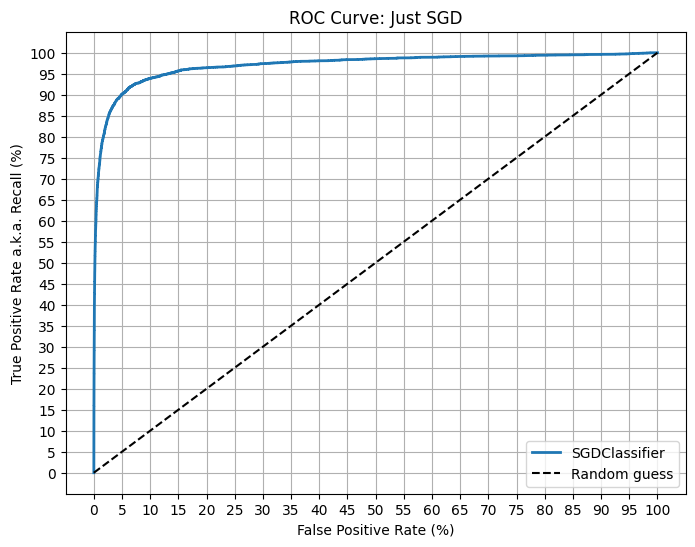

ROC AUC score: 0.9709618248430906


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))  # Adjust the figure size
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
    
    plt.xlabel("False Positive Rate (%)")
    plt.ylabel("True Positive Rate a.k.a. Recall (%)")
    plt.title("ROC Curve: Just SGD")

    plt.grid(True)
    plt.xticks([i * 0.05 for i in range(21)], [f"{i*5}" for i in range(21)])
    plt.yticks([i * 0.05 for i in range(21)], [f"{i*5}" for i in range(21)])
    
    plt.legend(loc="best")
    
    plt.show()

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plot_roc_curve(fpr, tpr, label="SGDClassifier")

auc_score = roc_auc_score(y_train_5, y_scores)
print("ROC AUC score:", auc_score)

# V. Training second model: Random Forest
To quickly recap from the last project, a Decision Tree is series of questions that guide a model down to node e.g. a vacation recommendation engine that asks you questions about desired destinations, month of travel, and budget constraints before suggesting a travel package.

A Random Forest is a collection of Decision Trees where the trees essentially vote/average out what the best method is.

Random Forests take more processing power than SGD (the first and only method we've tried), but is more accurate. If my theory is correct, a Random Forest line would show up on the chart to the left of and above the SGD line.

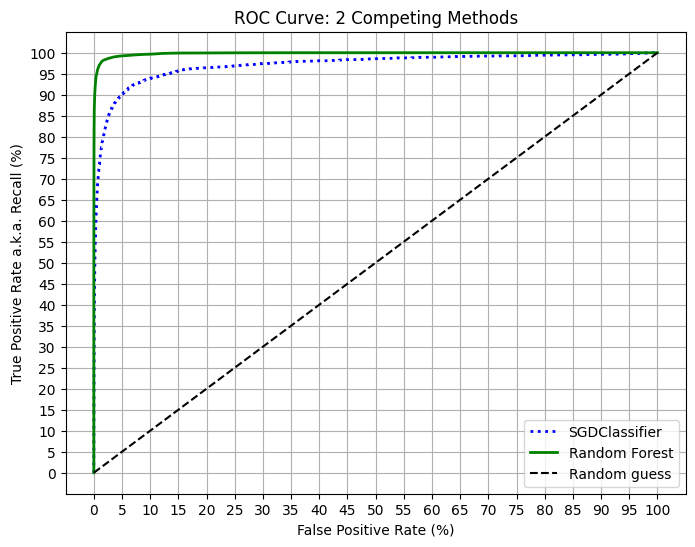

Random Forest ROC AUC score: 0.9983436731328145
SGDClassifier ROC AUC score: 0.9709618248430906


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Train RandomForest and get the predicted probabilities
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# Get scores for the positive class
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class

# Calculate ROC curve for Random Forest
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Calculate ROC curve for SGDClassifier (already calculated)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_5, y_scores)

# We need to rebuild the function to now include Random Forest
def plot_roc_curve_custom(fpr_sgd, tpr_sgd, fpr_forest, tpr_forest):
    plt.figure(figsize=(8, 6))  # Adjust figure size
    
    # Plot the ROC curve for SGD (METHOD 1)
    plt.plot(fpr_sgd, tpr_sgd, 'b:', linewidth=2, label="SGDClassifier")
    
    # Plot the ROC curve for Random Forest (METHOD 2)
    plt.plot(fpr_forest, tpr_forest, 'g-', linewidth=2, label="Random Forest")
    
    # Plot the "Random guess" diagonal (Our benchmark)
    plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
    
    plt.xlabel("False Positive Rate (%)")
    plt.ylabel("True Positive Rate a.k.a. Recall (%)")
    plt.title("ROC Curve: 2 Competing Methods")
    
    # Add gridlines for better readability
    plt.grid(True)
    
    # Customize tick marks (for both axes)
    plt.xticks([i * 0.05 for i in range(21)], [f"{i*5}" for i in range(21)])
    plt.yticks([i * 0.05 for i in range(21)], [f"{i*5}" for i in range(21)])
    
    plt.legend(loc="best")
    
    # Display the plot
    plt.show()

# Plot ROC curve with all classifiers, different from codeblock above
plot_roc_curve_custom(fpr_sgd, tpr_sgd, fpr_forest, tpr_forest)

auc_score_forest = roc_auc_score(y_train_5, y_scores_forest)
print("Random Forest ROC AUC score:", auc_score_forest)

auc_score_sgd = roc_auc_score(y_train_5, y_scores)
print("SGDClassifier ROC AUC score:", auc_score_sgd)

# VI. Evaluating second model: Random Forest
### 1. How thresholds work differently here than from Stochastic Gradient Descent (SGD, linear)
I'm going to set a probability threshold to 50%. Without context, one might think that means the model falsely assumes that 50% of the answers are supposed to be 5 when it's around 10% in an evenly distributed population. Think of it more like conditional probability/Bayesian probability:

*"Given what I've seen in the training data, this picture has a 50% or greater chance of being a 5. I'm trying to be unbiased."*

This is different from the absolute value integers used in SGD thresholds.

### 2. What does this mean?
Random Forest is able to achieve __99.0% precision while covering 87.3% on recall__. Amazing results!

In [39]:
from sklearn.metrics import precision_score, recall_score

y_pred_forest = (y_scores_forest >= 0.5) # the 50% threshold we discussed, 

precision_forest = precision_score(y_train_5, y_pred_forest)
recall_forest = recall_score(y_train_5, y_pred_forest)

print("Precision (Random Forest):", precision_forest)
print("Recall (Random Forest):", recall_forest)

Precision (Random Forest): 0.9897468089558485
Recall (Random Forest): 0.8725327430363402


### 1. Two approaches for multiclass classification
#### One-vs-all
Each of 10 digits gets its own "hot dog, not hot dog". Scikit-Learn will use this method by default, even if the binary classification at the start operated on hinge (linear SVM).

#### One-vs-one
Instead of comparing "digit vs not that digit", it's a round robin tournament where it might go something like 
- "0 or 1?"
- "0 or 2?"
- "0 or 3?"
- ....
- "8 or 9?"

So 10 digits * 9 alternatives divided by 2 (no need to double count pairs, since order doesn't matter) = 45 features for 10 unique digits

### 2. Making best guesses
Each one feature will be scored and the model will go with the highest score

#### Below example
We know that the first example should be a 5, but the model picked a 3.

FWIW, the model graded 5 at negative 1,386, which was the 2nd highest score to guessing the 3 3 (1,824). Maybe over a larger sample set, it will correct itself.

In [40]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
some_digit_scores = sgd_clf.decision_function([some_digit])
#some_digit_scores

In [41]:
index_pos =0
for each in some_digit_scores[0]:
    print(f"{index_pos} DIGIT: {round(each):>8,}")
    index_pos += 1

0 DIGIT:  -31,893
1 DIGIT:  -34,420
2 DIGIT:   -9,531
3 DIGIT:    1,824
4 DIGIT:  -22,320
5 DIGIT:   -1,386
6 DIGIT:  -26,189
7 DIGIT:  -16,148
8 DIGIT:   -4,604
9 DIGIT:  -12,051


In [42]:
sgd_clf.classes_ # the fact there are 10 instead of 45 classes in the array corrroborates it's 1 vs. All instead of 1v1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# VII. Side-by-side comparison of SGD vs. Random Forest

### 1. Swapping from 1 vs All to 1v1
If this works, there should be 45 features in the array, not 10

In [43]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [44]:
len(ovo_clf.estimators_)

45

In [45]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [46]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

### 2. Random forest leading to correct answer
Looking at the above array, there is a 0.9 chance or 90% probability that the image matches the 5th index in the array, which is a value of 5. So model believes there's a 90% of the answer we know is correct.

The runner-up is a 3 with an 8% probability. That's twice now that the models thought a 3 looks similar to a 5.

### 3. Switching back to SGD, with a twist
Let's go back to SGD which is a linear model, but do some feature scaling. Without us telling the computer, it might not realize 255 darkness is the ceiling, so we can take every pixel's integer value and normalize it down to a value between 0 and 1.

When we do cross-validation across 3 folds, accuracies average 86.7%

__After scaling, there's modest improvement to an average of 89.7%__

In [47]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### 4. Error analysis with full 10x10 confusion matrix

In [49]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

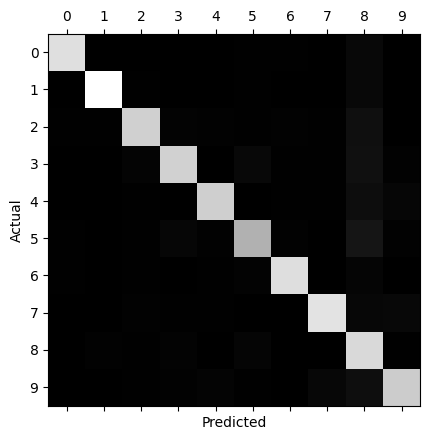

In [51]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray, fignum = 1)

# without these tick marks explicitly stated, it would go by 2s
plt.xticks(ticks=range(10), labels=range(10))
plt.yticks(ticks=range(10), labels=range(10))

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

### 5. Error detection enhancements
The above chart is based on absolute quantities of true positives (that light colored streak from top left to bottom right). That only works in an evenly distributed population, so we should __normalize__ it by looking at relative percentages.

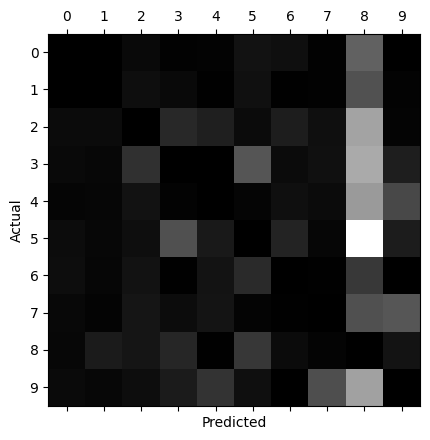

In [52]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xticks(ticks=range(10), labels=range(10))
plt.yticks(ticks=range(10), labels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

__The white area in the "8" column shows that a lot of the errors are other numbers being incorrectly guessed as 8s, namely the 5.__

In [53]:
# WARNING: not found in Geron's book

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=plt.cm.binary, **options)
    plt.axis("off")

### 6.Samples and how the models understood certain images
#### New experiment: "5 or 3?"
This is a limited version of the goodies we just ran above, but I'm simplifying down to 2 choices so we only have a 2x2 grid.

#### Does that pass the smell test? (easiest to understand listed first)
__Yes and no__. The true positives in the first 2 quadrants described make sense, but the errors don't fully make sense.

##### Top-left
All of those 3's look like 3s, so it makes sense the computer caught them.

##### Bottom-right 
All of those 5's look like 5s, so it makes sense the computer caught them. 

##### Top-right
I can see how five of these 3s of these might be confused with a 5, but that's still far from a majority.<br>
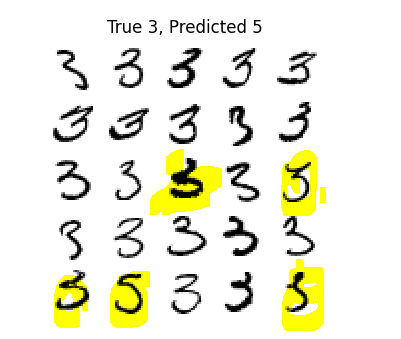

##### Bottom-left
I can see how two of these 5s of these might be confused with a 3. This is the bucket that makes the least sense to me.<br>
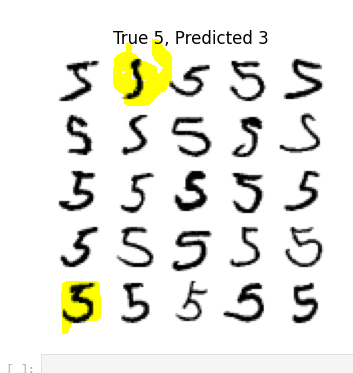

# Possible explanations
Geron suggests that the portion of the 3 where the 2 curves adjoin sometimes might be too far shifted to the left, triggering a false classification as a 5.

__Assuming that were true__ , which I'm not ready to agree with, we could improve accuracy by prepocessing these images (rotating them and/or centering them).

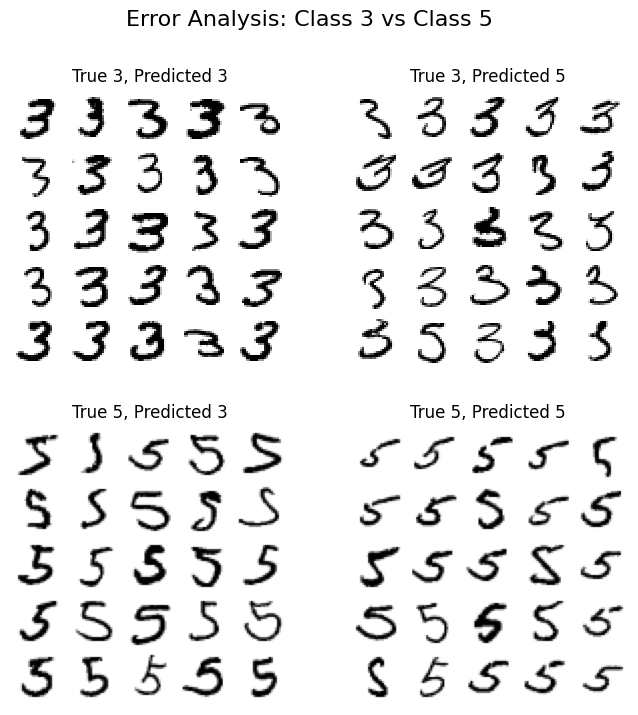

In [54]:
cl_a = 3
cl_b = 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))

plt.suptitle("Error Analysis: Class 3 vs Class 5", fontsize=16)

# add titles for each subplot
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.title(f"True {cl_a}, Predicted {cl_a}")

plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.title(f"True {cl_a}, Predicted {cl_b}")

plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.title(f"True {cl_b}, Predicted {cl_a}")

plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.title(f"True {cl_b}, Predicted {cl_b}")

plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.show()

# VIII. Final model performance validation
We already:
- Tested SGD
- Tested Random Forest
- Compared results and learned that Random Forest has good accuracy, precision, and recall.

Now it's time for the finale: taking the learnings from the training data (60,000 images) and applying that generalized model to the testing data (10,000 images) to see if we can score even higher.

Test Accuracy: 0.9705
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



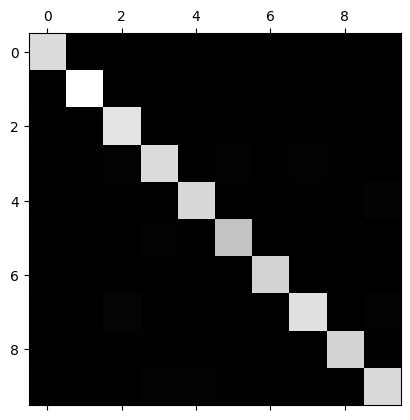

In [55]:
# Assuming your trained Random Forest model is called forest_clf
# and you have your test data as X_test and y_test

# Step 1: Predict on the test data
y_test_pred = forest_clf.predict(X_test)

# Step 2: Evaluate accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# You can also use other metrics like precision, recall, and F1-score:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

# Step 3: Confusion matrix for deeper insights
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_test_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()



Classification Report on Test Data:

              precision  recall  f1-score  support (actuals)  predictions
0                 0.968   0.991     0.979             980.00      971.000
1                 0.988   0.993     0.990            1135.00     1127.000
2                 0.962   0.971     0.966            1032.00     1002.000
3                 0.963   0.962     0.963            1010.00      972.000
4                 0.974   0.973     0.973             982.00      955.000
5                 0.976   0.964     0.970             892.00      860.000
6                 0.976   0.978     0.977             958.00      937.000
7                 0.972   0.963     0.967            1028.00      990.000
8                 0.962   0.955     0.958             974.00      930.000
9                 0.963   0.952     0.958            1009.00      961.000
accuracy          0.970   0.970     0.970               0.97        0.942
macro avg         0.970   0.970     0.970           10000.00     9702.073


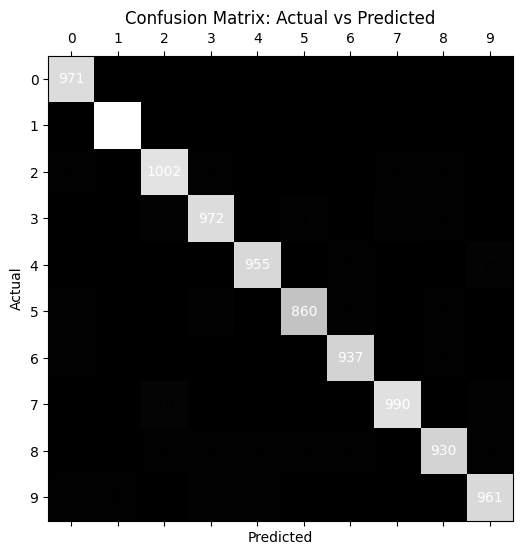

In [64]:
# 1. Displaying the Classification Report with Changes

from sklearn.metrics import classification_report, accuracy_score

# Assuming y_test and y_test_pred are the correct variables for actual and predicted labels
report = classification_report(y_test, y_test_pred, digits=3, output_dict=True)

# Convert the classification report to a DataFrame for a better display format and add columns for predictions and actual occurrences
import pandas as pd

report_df = pd.DataFrame(report).transpose()

# Renaming "support" to "support (actuals)"
report_df = report_df.rename(columns={'support': 'support (actuals)'})

# Adding a placeholder column for predictions (for each class, this isn't typically in sklearn reports but can be added manually)
report_df['predictions'] = report_df['support (actuals)'] * report_df['recall']  # Placeholder for predictions based on recall

# Rounding all columns to 3 decimal places for consistency
report_df = report_df.round(3)

# Display the classification report as a DataFrame
print("\nClassification Report on Test Data:\n")
print(report_df)

# 2. Print Test Accuracy with 3 decimals
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.3f}")

# 3. Plotting the Confusion Matrix with Adjustments

plt.figure(figsize=(6, 6))  # Adjusted size to 6x6

# Plot the confusion matrix in grayscale
plt.matshow(conf_mx, cmap=plt.cm.gray, fignum=1)

# Adding tick marks for digits (0-9) with a label for each unit
plt.xticks(ticks=range(10), labels=range(10), rotation=0)
plt.yticks(ticks=range(10), labels=range(10), rotation=0)

# Add axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Actual vs Predicted")

# Annotate each cell in the confusion matrix with its respective value
for i in range(conf_mx.shape[0]):
    for j in range(conf_mx.shape[1]):
        plt.text(j, i, f'{conf_mx[i, j]}', horizontalalignment='center', 
                 verticalalignment='center', color="white" if conf_mx[i, j] > conf_mx.max() / 2 else "black")

# Show the confusion matrix plot
plt.show()
